In [1]:
def border(aperture):
    together=[]
    for i, eachline in enumerate(aperture):
        for j, each in enumerate(eachline):
            if each==1:
                together.append([[j,j+1],[i,i]])
                together.append([[j,j+1],[i+1,i+1]])
                together.append([[j,j],[i,i+1]])
                together.append([[j+1,j+1],[i,i+1]])
    filtered=[]
    for each in together:
        c=0
        for EACH in together:
            if each==EACH:
                c+=1
        if c==1:
            filtered.append(each)
            
    return filtered

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from lightkurve import TessTargetPixelFile

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


Error initializing plugin EntryPoint('Windows (alt)', 'keyrings.alt.Windows', None, Distribution('keyrings.alt', '3.0')).
Traceback (most recent call last):
  File "/home/pal/.local/lib/python3.6/site-packages/keyring/backend.py", line 194, in _load_plugins
    init_func = ep.load()
  File "/home/pal/.local/lib/python3.6/site-packages/entrypoints.py", line 82, in load
    mod = import_module(self.module_name)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/l

In [3]:
hdul = fits.open("betador/fits/s1/tess2018234152941-s0001-4-4-0120-s_ffic.fits")[0]
wcs = WCS(hdul.header)


sector1ffn='tess2018206045859-s0001-0000000149346418-0120-s_tp.fits'
tpf_s1 = TessTargetPixelFile(sector1ffn)

 [astropy.io.fits.verify]


In [4]:
coord = SkyCoord(ra=83.40630967798376, dec=-62.48977125108528, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.1*32*1.414*21/3600, u.deg)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()
r.pprint()

Query finished.
         dist          ...
                       ...
---------------------- ...
5.2030643635554925e-06 ...
   0.00327731245051677 ...
  0.009260581924779184 ...
  0.010163180350853781 ...
  0.010232114986970185 ...
  0.010571988517761897 ...
  0.011291259288672972 ...
  0.011409032298542447 ...
  0.011498865367142749 ...
  0.011939990140685754 ...
                   ... ...
    0.2902291779564049 ...
    0.2902449607200544 ...
    0.2902527586203929 ...
   0.29025309481944134 ...
    0.2902618478458813 ...
    0.2902619481335399 ...
     0.290263731695323 ...
   0.29029045137346954 ...
   0.29032678519836996 ...
    0.2903327504180711 ...
Length = 15717 rows


In [29]:
extractedgaiadata=[
r[(r['phot_g_mean_mag'] < 17)]['source_id'],
r[(r['phot_g_mean_mag'] < 17)]['ra'],
r[(r['phot_g_mean_mag'] < 17)]['dec'],
r[(r['phot_g_mean_mag'] < 17)]['phot_g_mean_mag'],
r[(r['phot_g_mean_mag'] < 17)]['phot_rp_mean_mag']]

In [31]:
sizearray=[]
for index, each in enumerate(extractedgaiadata[4]):
    if np.isscalar(each):
        sizearray.append(each)
    else:
        sizearray.append(extractedgaiadata[3][index])
brightness=np.asarray(sizearray)
sizearray=np.asarray(sizearray)


In [41]:
sizearray = 60*(np.max(sizearray)-sizearray)

In [13]:
ourap=np.asarray([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

ourap = ourap > 0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


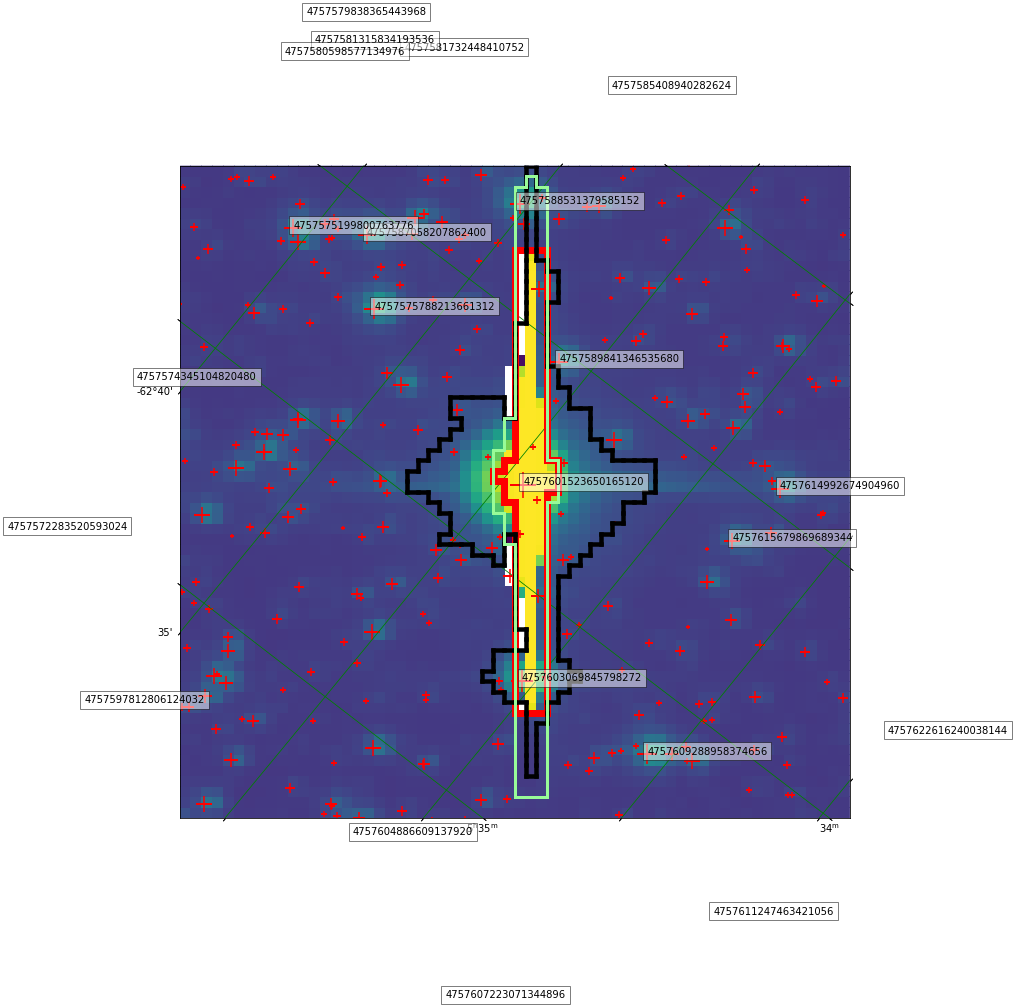

In [42]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(np.log(hdul.data))

filtered=border(tpf_s1.pipeline_mask*1)
for x in range(len(filtered)):
    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
    
tasocaper=np.genfromtxt('tess00149346418-s01-c0120-dr01-v03-tasoc_lc_aperture.txt')
tasocaper=np.asarray(tasocaper)
tasocaper=(tasocaper == 75)*1
filtered_tasoc=border(tasocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_tasoc[x][0])+19,np.asarray(filtered_tasoc[x][1])+1,c='black', linewidth=4.5)


filtered_ourap=border(ourap)
for x in range(len(filtered_ourap)):
    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
    if brightness[x]<12:
        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

ax.set_xlim([0, 62])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')


In [64]:
tasocaper=np.genfromtxt('tess00149346418-s01-c0120-dr01-v03-tasoc_lc_aperture.txt')
tasocaper=np.asarray(tasocaper)
tasocaper=(tasocaper == 75)*1

In [69]:
filtered_tasoc

[[[12, 13], [9, 9]],
 [[12, 12], [9, 10]],
 [[13, 14], [9, 9]],
 [[14, 15], [9, 9]],
 [[15, 15], [9, 10]],
 [[12, 12], [10, 11]],
 [[15, 15], [10, 11]],
 [[12, 12], [11, 12]],
 [[15, 15], [11, 12]],
 [[12, 12], [12, 13]],
 [[15, 15], [12, 13]],
 [[12, 12], [13, 14]],
 [[15, 15], [13, 14]],
 [[12, 12], [14, 15]],
 [[15, 15], [14, 15]],
 [[12, 12], [15, 16]],
 [[15, 15], [15, 16]],
 [[12, 12], [16, 17]],
 [[15, 15], [16, 17]],
 [[12, 12], [17, 18]],
 [[15, 15], [17, 18]],
 [[12, 12], [18, 19]],
 [[15, 15], [18, 19]],
 [[12, 12], [19, 20]],
 [[15, 15], [19, 20]],
 [[12, 12], [20, 21]],
 [[15, 15], [20, 21]],
 [[12, 12], [21, 22]],
 [[15, 15], [21, 22]],
 [[12, 12], [22, 23]],
 [[15, 15], [22, 23]],
 [[12, 12], [23, 24]],
 [[15, 15], [23, 24]],
 [[12, 12], [24, 25]],
 [[15, 15], [24, 25]],
 [[12, 12], [25, 26]],
 [[15, 15], [25, 26]],
 [[12, 12], [26, 27]],
 [[15, 15], [26, 27]],
 [[12, 12], [27, 28]],
 [[15, 15], [27, 28]],
 [[12, 12], [28, 29]],
 [[15, 15], [28, 29]],
 [[11, 12], [29, 29

In [70]:
filtered

[[[12, 13], [9, 9]],
 [[12, 12], [9, 10]],
 [[13, 14], [9, 9]],
 [[14, 15], [9, 9]],
 [[15, 15], [9, 10]],
 [[12, 12], [10, 11]],
 [[15, 15], [10, 11]],
 [[12, 12], [11, 12]],
 [[15, 15], [11, 12]],
 [[12, 12], [12, 13]],
 [[15, 15], [12, 13]],
 [[12, 12], [13, 14]],
 [[15, 15], [13, 14]],
 [[12, 12], [14, 15]],
 [[15, 15], [14, 15]],
 [[12, 12], [15, 16]],
 [[15, 15], [15, 16]],
 [[12, 12], [16, 17]],
 [[15, 15], [16, 17]],
 [[12, 12], [17, 18]],
 [[15, 15], [17, 18]],
 [[12, 12], [18, 19]],
 [[15, 15], [18, 19]],
 [[12, 12], [19, 20]],
 [[15, 15], [19, 20]],
 [[12, 12], [20, 21]],
 [[15, 15], [20, 21]],
 [[12, 12], [21, 22]],
 [[15, 15], [21, 22]],
 [[12, 12], [22, 23]],
 [[15, 15], [22, 23]],
 [[12, 12], [23, 24]],
 [[15, 15], [23, 24]],
 [[12, 12], [24, 25]],
 [[15, 15], [24, 25]],
 [[12, 12], [25, 26]],
 [[15, 15], [25, 26]],
 [[12, 12], [26, 27]],
 [[15, 15], [26, 27]],
 [[12, 12], [27, 28]],
 [[15, 15], [27, 28]],
 [[12, 12], [28, 29]],
 [[15, 15], [28, 29]],
 [[11, 12], [29, 29

In [67]:
for each in tasocaper:
    print(each)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0